# Project 1 : 당뇨병 수치를 맞춰보자!
----

## 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target
print(type(df_x))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


column 중 sex와 나이가 소숫값으로 나와있는 것을 볼 수 있는데 dataset을 임의로 -0.2~0.2로 조정해놓은 것이라고 한다.

컬럼을 사용한다면 원핫인코딩할 필요없이 그대로 진행하면 될 것 같다.

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
import pandas as pd
pd_data=pd.DataFrame(df_x)
pd_data

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
print(df_x.shape)
df_x=df_x[:,2:]   # age,sex 빼고 나머지 컬럼만 사용

(442, 10)


In [7]:
print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df_x,df_y,random_state=28,
                                               test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(353, 8)
(89, 8)


In [9]:
print(y_train.shape)
print(y_test.shape)

(353,)
(89,)


## 모델 준비하기

In [10]:
import numpy as np

w = np.random.rand(8)
b = np.random.rand()

In [11]:
w

array([0.21700213, 0.48970074, 0.11004151, 0.16279865, 0.29556835,
       0.10472704, 0.02388258, 0.79158999])

In [12]:
b

0.18453712559414248

In [13]:
def model(x,w,b):
    prediction=0
    for i in range(8):
        prediction+= x[:,i]*w[i]
    prediction+=b
    return prediction

## 손실함수 loss 정의하기

In [14]:
def mse(a,b):
    mse=((a-b)**2).mean()
    return mse

In [15]:
def loss(x,w,b,y):
    prediction=model(x,w,b)
    loss = mse(prediction,y)
    return loss

## gradient 함수 구현

In [16]:
def gradient(x,w,b,y):
    N=len(y)
    
    y_pred=model(x,w,b)
    
    dw=1/N*2*x.T.dot(y_pred-y)
    
    db=2*(y_pred-y).mean()
    return dw,db

## 학습률 설정

In [17]:
lr_rate=0.6

## 모델 학습

In [18]:
losses=[]
for i in range(1,2001):
    dw,db=gradient(X_train,w,b,y_train)
    w -= lr_rate*dw
    b -= lr_rate*db
    l = loss(X_train, w, b, y_train)
    losses.append(l)
    if i%100==0:
        print(f'Iteration {i} : Loss {l:0.4f}')

Iteration 100 : Loss 3684.9495
Iteration 200 : Loss 3212.5415
Iteration 300 : Loss 3047.5148
Iteration 400 : Loss 2968.2440
Iteration 500 : Loss 2924.4485
Iteration 600 : Loss 2898.4199
Iteration 700 : Loss 2882.1022
Iteration 800 : Loss 2871.4099
Iteration 900 : Loss 2864.1458
Iteration 1000 : Loss 2859.0684
Iteration 1100 : Loss 2855.4415
Iteration 1200 : Loss 2852.8081
Iteration 1300 : Loss 2850.8719
Iteration 1400 : Loss 2849.4341
Iteration 1500 : Loss 2848.3572
Iteration 1600 : Loss 2847.5443
Iteration 1700 : Loss 2846.9259
Iteration 1800 : Loss 2846.4514
Iteration 1900 : Loss 2846.0839
Iteration 2000 : Loss 2845.7961


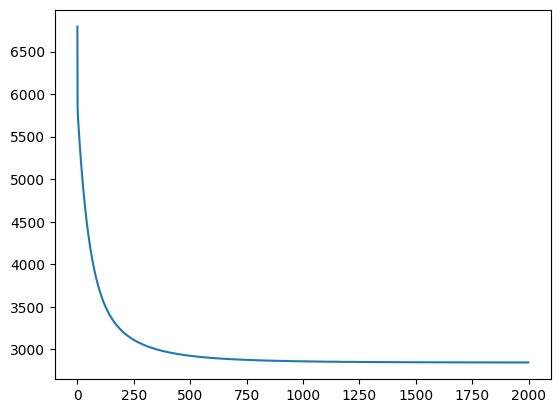

In [19]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [20]:
w,b

(array([ 550.53548762,  311.17049973,  -40.40417862, -149.46255734,
        -138.58216911,   90.22666   ,  487.57338846,   26.89403259]),
 151.66680153622153)

##  test 데이터 성능 확인

In [21]:
prediction=model(X_test,w,b)
mse = loss(X_test,w,b,y_test)
mse

3540.146196916674

## 정답 데이터와 예측한 데이터 시각화

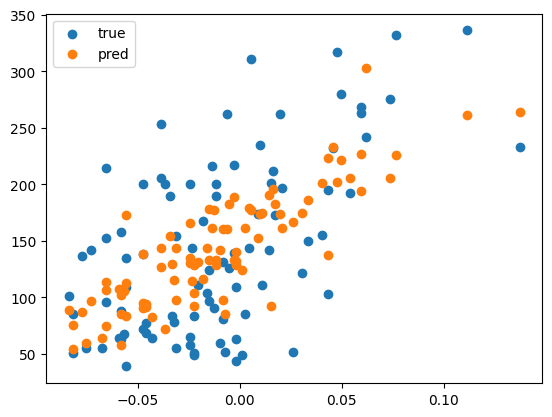

In [22]:
plt.scatter(X_test[:,0],y_test,label='true')
plt.scatter(X_test[:,0],prediction,label='pred')
plt.legend()
plt.show()

## 회고

- 이번 프로젝트에서 모든 컬럼을 고려한 모델로 test 데이터를 돌려봤을 때 데이터 분포가 중구난방으로 퍼지게 되었음. 왜그런지 알아보니 이번에 사용한 당뇨병 환자 데이터같은 경우 sex와 age가 -0.2 ~ 0.2 사이 값으로 설정되어있어서 값에 노이즈가 생긴 것 같았다. 그래서 sex와 age 컬럼 두개를 뺐고, 남은 8개의 컬럼으로 모델을 training시키고 8개 컬럼으로만 예측한 결과 모두 사용했을 때보다 prediction 분포가 육안으로 봐도 더 선형적으로 보이게 되었음. 결과에 도움이 되지않는 데이터 컬럼은 과감히 버리는 것도 한 방법임을 알았습니다.(아니면 규제를 가해도 됨)

- 이번 프로젝트에서 loss값이 큰 이유는 X축 데이터 값에 비에 y축 값이 너무 커서 크게 나온다. y축 값을 일정한 값으로 나누어서 시각화하면 정규화되어 작은 loss값을 얻을 수 있다.

## 참고문헌 

regression 클래스화
https://yhyun225.tistory.com/11

# Project 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
---

## 데이터 가져오기

In [23]:
train = pd.read_csv('bicycle_train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## datetime 자료형으로 변환, 연,월,일,시,분,초 컬럼 생성

In [24]:
dates = pd.to_datetime(train['datetime'])
train['year'] = dates.dt.year
train['month'] = dates.dt.month
train['day'] = dates.dt.day
train['hour'] = dates.dt.hour
train['minute'] = dates.dt.minute
train['second'] = dates.dt.second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


## year,month,day,hour,minute,second 데이터 개수 시각화

<AxesSubplot: xlabel='second', ylabel='count'>

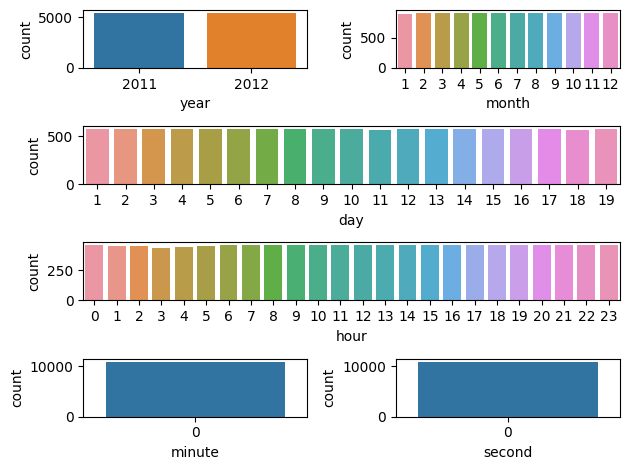

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(tight_layout=True)
a= fig.add_subplot(4,2,1)
b= fig.add_subplot(4,2,2)
c= fig.add_subplot(4,1,2)
d= fig.add_subplot(4,1,3)
e= fig.add_subplot(4,2,7)
f= fig.add_subplot(4,2,8)

sns.countplot(x=train['year'],ax=a)
sns.countplot(x=train['month'],ax=b)
sns.countplot(x=train['day'],ax=c)
sns.countplot(x=train['hour'],ax=d)
sns.countplot(x=train['minute'],ax=e)
sns.countplot(x=train['second'],ax=f)

## 컬럼 선택, 데이터 분리

<AxesSubplot: >

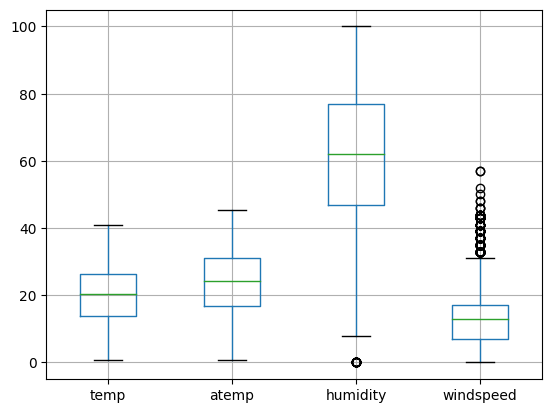

In [26]:
train.iloc[:,5:9].boxplot()

In [27]:
train['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

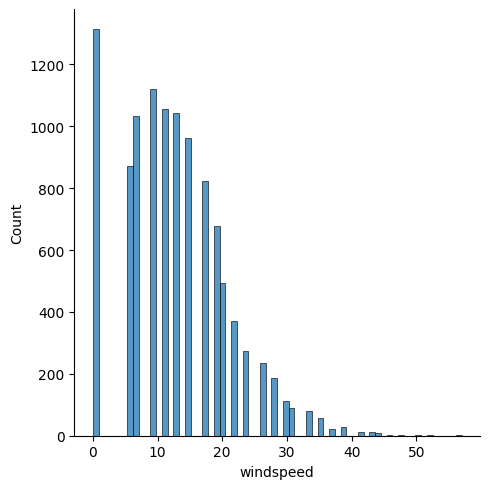

In [28]:
sns.displot(train['windspeed'])

In [29]:
X=train[['season','holiday','workingday','weather','temp','atemp','humidity','year','month','day','hour']]
y=train['count']

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=28,test_size=0.2)

## LinearRegression 모델 학습

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## X_test에 대한 예측값 출력 및 손실함수값 계산

In [32]:
prediction = model.predict(X_test)   # 예측값
prediction

array([163.81733635,  37.12038392, 123.50699252, ..., 119.05095214,
       156.64458204, 204.31780091])

In [33]:
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_test,prediction)
rmse = (mse)**0.5
print(f"mse : {mse}, rmse : {rmse}")

mse : 18315.133429580543, rmse : 135.3334157907076


## X_train과 X_test에 대한 score

In [34]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.38516382952419803
0.40226397114071644


아무래도 선형회귀보단 다른 모델을 선정하는 것이 과소 적합을 막을 수 있을 것 같다.

## X축 temp 또는 humidity로 y축은 count로 예측 결과 시각화

In [35]:
model.coef_,model.intercept_

(array([-9.75503295, -1.37088511,  1.37084073, -3.71942406,  2.26531426,
         4.00796512, -2.11313237, 86.04966195, 10.66371626,  0.23625459,
         7.84355234]),
 -173039.79397360486)

<AxesSubplot: xlabel='humidity'>

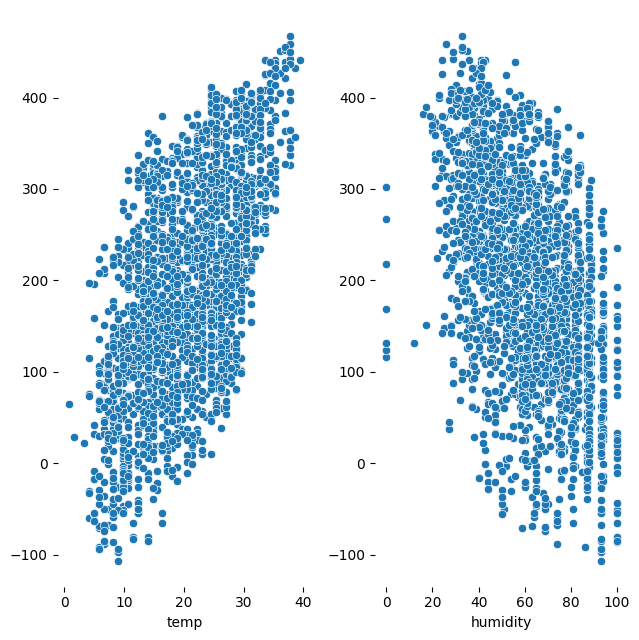

In [36]:
fig, axe = plt.subplots(1,2,tight_layout=True,figsize=(6.5,6.5))
x=np.arange(10,40)
sns.despine(fig,left=True,bottom=True)
sns.scatterplot(x=X_test['temp'],y=prediction,ax=axe[0])
sns.scatterplot(x=X_test['humidity'],y=prediction,ax=axe[1],sizes=(1,8))

## 회고



먼저 컬럼들 중 연속적인 데이터만 boxplot해본 결과 windspeed만 이상치가 상대적으로 많이 발견되었다. 하지만 분포가 0~20정도에 몰려있고 이상치는 60이하들로 태풍이나 돌풍에 의한 이상치라고 가정할 수 있겠다.

temp가 높을 수록 count(자전거타는 사람 숫자)가 높고, humidity가 클수록 count가 낮았다.

prediction 그래프만 봐도 시각 적으로 확인 할 수 있는데 rmse가 150보다 낮긴 하지만 score가 train과 test 모두에서 낮았다.

과소적합인 경우 데이터에 비해 모델이 너무 단순하다라고 볼 수 있다. 그래서 데이터 컬럼의 갯수를 대폭 줄여보았지만 컬럼 갯수를 줄일 수록 score가 줄어드는 놀라운 결과를 확인했다. rmse 또한 커짐(150이상).

알아본 결과 추후에 배울 linearRegrresion보다 더 복잡한 모델이나 초기 기울기 설정 후 손실함수를 고려하는 backpropagation을 사용하는 것으로 조금 더 예측력을 올릴 수 있겠다는 생각이 들었습니다.


# 참고문헌

과적합,과소적합 https://cord-ai.tistory.com/16